#Customer Segmentation for a Financial Services Company

FinTech Solutions S.p.A., a leader in the financial services sector, has decided to launch a new marketing campaign to promote its line of credit cards. To optimize the effectiveness of the campaign, the company has decided to segment its customers into homogeneous groups based on spending behavior and credit card usage.

This segmentation will allow the company to target personalized marketing campaigns to each customer cluster, thereby maximizing return on investment and improving the user experience.

Project Objective:

The main objective is to develop a customer segmentation model based on information provided by the company’s dataset, which contains data from various credit card holders. The segmentation will help FinTech Solutions identify specific clusters to direct targeted marketing strategies.

Dataset Description:

The available dataset contains the following information:

* CUST_ID: Unique identifier of the credit card holder (categorical).

* BALANCE: Amount of remaining balance on the account for purchases.

* BALANCE_FREQUENCY: Frequency of balance updates, scored between 0 and 1 (1 = frequently updated, 0 = rarely updated).

* PURCHASES: Total quantity of purchases made from the account.

* ONEOFF_PURCHASES: Maximum amount of purchases made in a single transaction.

* INSTALLMENTS_PURCHASES: Amount of purchases made in installments.

* CASH_ADVANCE: Cash advance taken by the user.

* PURCHASES_FREQUENCY: Purchase frequency, scored between 0 and 1 (1 = frequent purchases, 0 = infrequent purchases).

* ONEOFFPURCHASESFREQUENCY: Frequency of one-off purchases (1 = frequent, 0 = infrequent).

* PURCHASESINSTALLMENTSFREQUENCY: Frequency of installment purchases (1 = frequent, 0 = infrequent).

* CASHADVANCEFREQUENCY: Frequency of cash advances requested.

* CASHADVANCETRX: Number of cash advance transactions made.

* PURCHASES_TRX: Total number of purchase transactions made.

* CREDIT_LIMIT: Maximum credit limit for each user.

* PAYMENTS: Total amount of payments made by the user.

* MINIMUM_PAYMENTS: Minimum payment amount made by the user.

* PRCFULLPAYMENT: Percentage of full payment made by the user.

* TENURE: Duration of credit card service for the user (in years).

Added Value:

Customer segmentation through clustering techniques offers several strategic benefits:

Marketing Optimization:
By identifying specific customer behaviors and preferences, the company can create targeted promotional campaigns, improving response and conversion rates.

Personalized Offers:
Clusters can be used to develop tailored offers (e.g., promotions for increasing credit limits, discounts on installment purchases) that better meet customer needs.

Operational Efficiency:
Through segmentation, the company can focus resources on the most profitable customers, optimizing acquisition and retention costs.

Growth Opportunity Identification:
Segmentation can reveal customer groups with growth potential (e.g., those who frequently use installment purchases but not full payments), allowing the company to propose additional financial products.

Project Phases

Exploratory Data Analysis (EDA):

Begin with an exploratory analysis of the dataset to better understand variable distributions, identify any missing data, and evaluate the need for data transformations.

Data Preprocessing:

Handle missing values (e.g., in MINIMUM_PAYMENTS).
Normalize and standardize quantitative variables like BALANCE, PURCHASES, and CASH_ADVANCE.

Segmentation via Clustering:

Use clustering algorithms (such as K-Means or DBSCAN) to identify homogeneous customer groups.
Evaluate clustering performance using metrics like silhouette score and the elbow method.

Cluster Interpretation:

Analyze and describe the clusters in terms of:

* Average spending (balance, one-off purchases, installment purchases).

* Payment habits (percentage of minimum payments, full payments).

* Card usage frequency (cash advances, purchase frequency).



##Exploratory data analysis

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [31]:
url = 'https://proai-datasets.s3.eu-west-3.amazonaws.com/credit_card_customers.csv'
df = pd.read_csv(url)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [32]:
df.shape

(8950, 18)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [34]:
df.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [35]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [36]:
df.duplicated().sum()

np.int64(0)

##Data preprocessing

In [37]:
df_copy = df.copy()

In [38]:
df_copy = df_copy.drop('CUST_ID',axis=1)

In [39]:
df['MINIMUM_PAYMENTS'].mean()

np.float64(864.2065423050828)

In [40]:
df['MINIMUM_PAYMENTS'].median()

312.343947

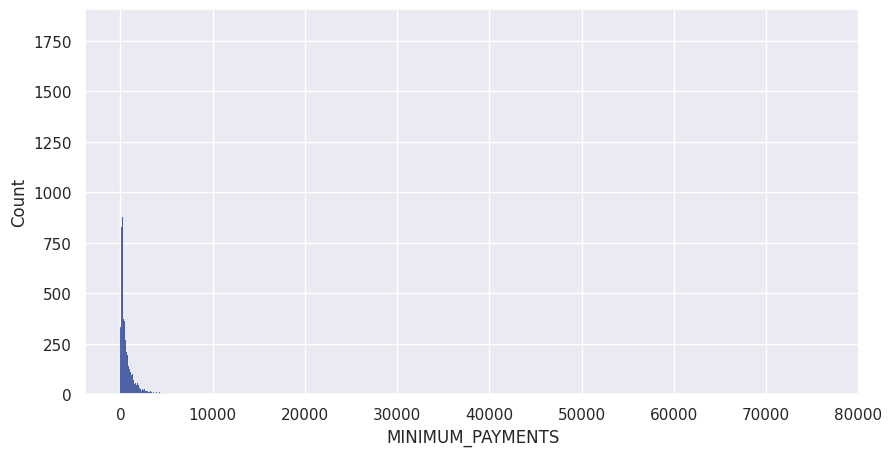

In [41]:
sns.histplot(df['MINIMUM_PAYMENTS'])
plt.show()

In [42]:
replace_with = df_copy.median(numeric_only=True)
replace_with

,0
BALANCE,873.385231
BALANCE_FREQUENCY,1.000000
PURCHASES,361.280000
ONEOFF_PURCHASES,38.000000
INSTALLMENTS_PURCHASES,89.000000
CASH_ADVANCE,0.000000
PURCHASES_FREQUENCY,0.500000
ONEOFF_PURCHASES_FREQUENCY,0.083333
PURCHASES_INSTALLMENTS_FREQUENCY,0.166667
CASH_ADVANCE_FREQUENCY,0.000000


In [43]:
df_copy = df_copy.fillna(replace_with)
df_copy

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [44]:
df_copy.isna().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [45]:
df_scaled = df_copy.copy()
columns = ['BALANCE','PURCHASES','ONEOFF_PURCHASES',
           'INSTALLMENTS_PURCHASES','CASH_ADVANCE',
           'CASH_ADVANCE_TRX','PURCHASES_TRX',
           'CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS']

scaler = StandardScaler()
df_scaled[columns] = scaler.fit_transform(df_scaled[columns])
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,0.818182,-0.424900,-0.356934,-0.349079,-0.466786,0.166667,0.000000,0.083333,0.000000,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,0.000000,12
1,0.786961,0.909091,-0.469552,-0.356934,-0.454576,2.605605,0.000000,0.000000,0.000000,0.250000,0.110074,-0.591796,0.688678,0.818642,0.097500,0.222222,12
2,0.447135,1.000000,-0.107668,0.108889,-0.454576,-0.466786,1.000000,1.000000,0.000000,0.000000,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,0.000000,12
3,0.049099,0.636364,0.232058,0.546189,-0.454576,-0.368653,0.083333,0.083333,0.000000,0.083333,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,0.000000,12
4,-0.358775,1.000000,-0.462063,-0.347294,-0.454576,-0.466786,0.083333,0.083333,0.000000,0.000000,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,0.000000,12


##Clustering segmentation

In [46]:
plt.rcParams['figure.figsize'] = (10,5)
sns.set_theme(palette='dark')
RANDOM_SEED = 1

In [47]:
def plot_ssd_curve(x, k_range=(1, 10)):
  ssd = {}
  for k in range(k_range[0], k_range[1]):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=RANDOM_SEED)
    kmeans.fit(x)
    ssd[k] = kmeans.inertia_

  plt.plot(list(ssd.keys()), list(ssd.values()), marker="o")
  plt.xlabel("Number of clusters")
  plt.ylabel("SSD")
  plt.title("The Elbow Method")
  plt.show()

In [48]:
x = df_scaled.values

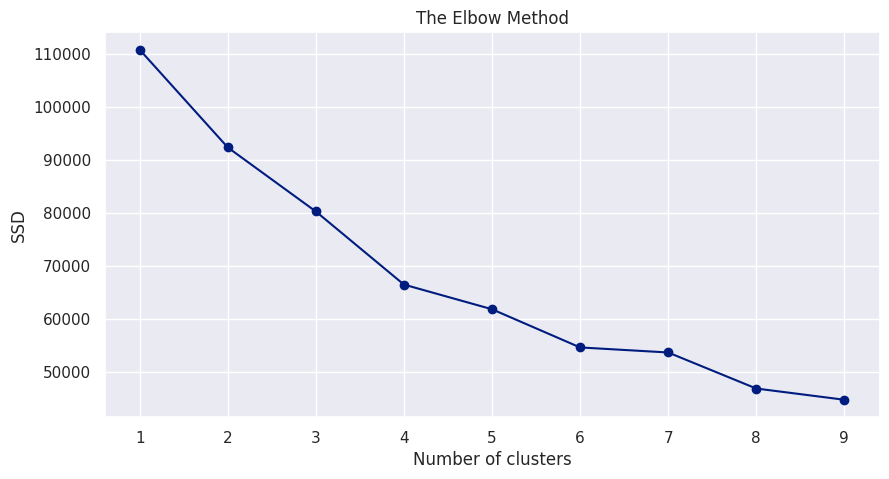

In [49]:
plot_ssd_curve(x)

In [50]:
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=RANDOM_SEED)
kmeans.fit(x)

KMeans(n_clusters=4, random_state=1)

In [51]:
kmeans.inertia_

66496.72666619788

In [52]:
df_scaled["Cluster"] = kmeans.labels_
df_scaled["Cluster"].value_counts()

,count
Cluster,
0,6640
1,1110
2,733
3,467


In [53]:
pca = PCA(n_components=2, random_state=RANDOM_SEED)
x_pca = pca.fit_transform(x)
df_pca = pd.DataFrame(data=x_pca, columns=["pc1", "pc2"])
df_pca["Cluster"] = df_scaled["Cluster"].values

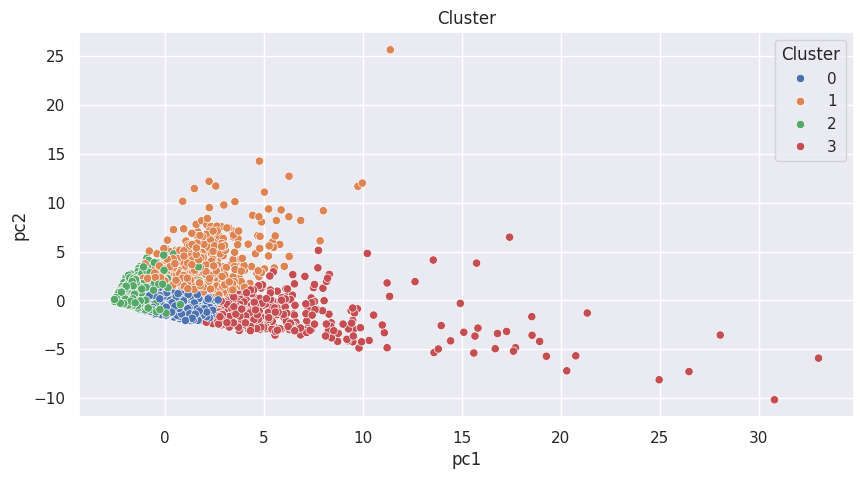

In [54]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_pca, x="pc1", y="pc2", hue="Cluster", palette="deep")
plt.title("Cluster")
plt.show()

##Cluster interpretation

In [55]:
df_scaled.groupby("Cluster").mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,-0.296662,0.865042,-0.143281,-0.128613,-0.102513,-0.282360,0.493565,0.184196,0.365617,0.084023,-0.238699,-0.124398,-0.209504,-0.210157,-0.122298,0.162107,11.896536
1,1.632843,0.966564,-0.190610,-0.135651,-0.201571,1.712230,0.317129,0.151424,0.220193,0.428313,1.501109,-0.226380,1.025003,0.749491,0.694141,0.037480,11.777477
2,-0.316054,0.785622,-0.260746,-0.195776,-0.256589,0.080379,0.432537,0.129277,0.294809,0.196626,0.016315,-0.352109,-0.506474,-0.361986,-0.209222,0.172686,7.407913
3,0.833076,0.982748,2.899553,2.458384,2.339421,-0.181199,0.947118,0.698274,0.799810,0.068681,-0.199628,2.859482,1.337472,1.774821,0.417387,0.280882,11.957173


Cluster 0: Moderate and Stable Users
* Below-average balance: they use little remaining credit.
* Regular purchase frequency and card usage.
* Payments and credit limits slightly below average.
* Long card tenure (almost 12 years).

Profile: Loyal and stable customers who use their card consistently but moderately, without significant spending spikes or cash advances.



Cluster 1: High Cash Advance Users
* High balance and very high use of cash advances.

* Many cash advance transactions.

* Lower purchase frequency.

* Long card tenure.

Profile: Customers who tend to use their card mainly for cash advances rather than purchases. This could indicate more urgent financial needs or unconventional card use.

Cluster 2: Low Activity or Dormant Customers
* Below-average values across nearly all variables, including balance.

* Shorter tenure (around 7 years).

* Low purchases and payments.

Profile: Inactive or dormant customers, minimally engaged in transactions, potentially new customers or at risk of attrition.

Cluster 3: High-Value and High-Activity Customers
* Very high total purchases, both one-off and installment.

* Very frequent transactions and payments.

* High credit limit and positive balance.

* Very long card tenure.

Profile: Premium customers who spend a lot regularly, ideal for loyalty campaigns, exclusive offers, and VIP programs.